In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("50_Startups.csv")

In [3]:
# Exploratory Data Analysis
print("First 5 rows of the dataset:\n", df.head())
print("\nDataset statistics:\n", df.describe())
print("\nData types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())

First 5 rows of the dataset:
    R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Dataset statistics:
            R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.0850

In [4]:
# Data Preprocessing (if necessary)
# Encoding categorical variables using Label Encoding
labelencoder = LabelEncoder()
df['State'] = labelencoder.fit_transform(df['State'])

In [5]:
# Selecting the 'Profit' column for clustering
feature = 'Profit'

In [6]:
# Check for zero or missing values and handle them if necessary
print("Number of zero values in {}: {}".format(feature, df[df[feature] == 0].shape[0]))
print("Number of missing values in {}: {}".format(feature, df[feature].isnull().sum()))

Number of zero values in Profit: 0
Number of missing values in Profit: 0


In [7]:
# Scaling the data for clustering
scaler = StandardScaler()
df[feature] = scaler.fit_transform(df[[feature]])

In [8]:
# Apply Hierarchical Clustering
# Using 'ward' linkage method for hierarchical clustering
linked = linkage(df[[feature]], method='ward')

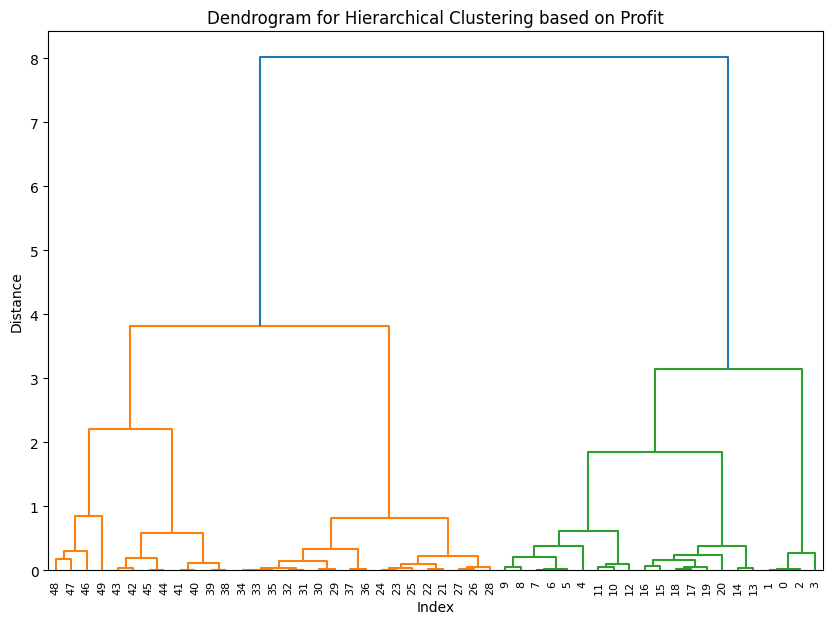

In [9]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering based on Profit")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

In [10]:
# Assigning clusters based on a threshold distance
# Choose an optimal threshold to cut the dendrogram
threshold = 5  # Adjust based on dendrogram to find optimal clusters
df['Cluster'] = fcluster(linked, threshold, criterion='distance')

In [11]:
# Display cluster information
print("Cluster assignments:\n", df['Cluster'].value_counts())

Cluster assignments:
 Cluster
2    29
1    21
Name: count, dtype: int64


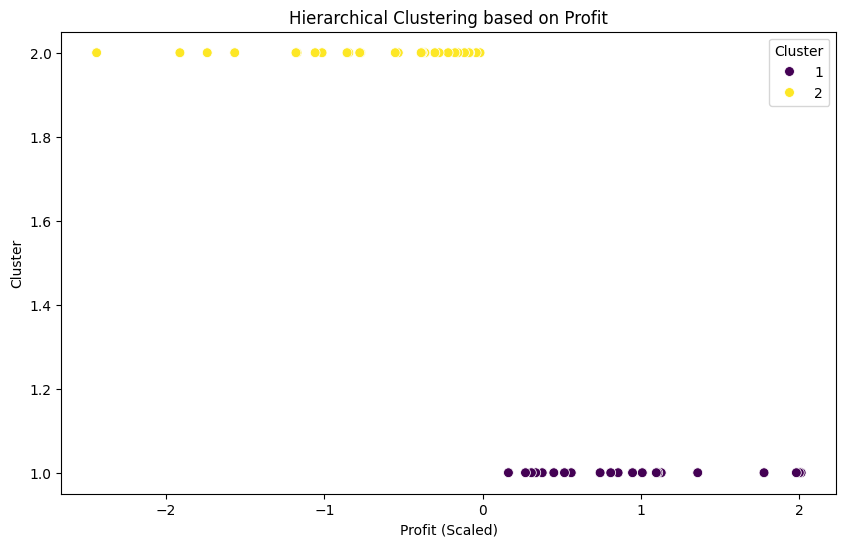

In [12]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature, y='Cluster', data=df, hue='Cluster', palette='viridis', s=50)
plt.title("Hierarchical Clustering based on Profit")
plt.xlabel("Profit (Scaled)")
plt.ylabel("Cluster")
plt.legend(title="Cluster")
plt.show()